###  Importing  necessary packages

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


### Load and preprocess the data

In [2]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

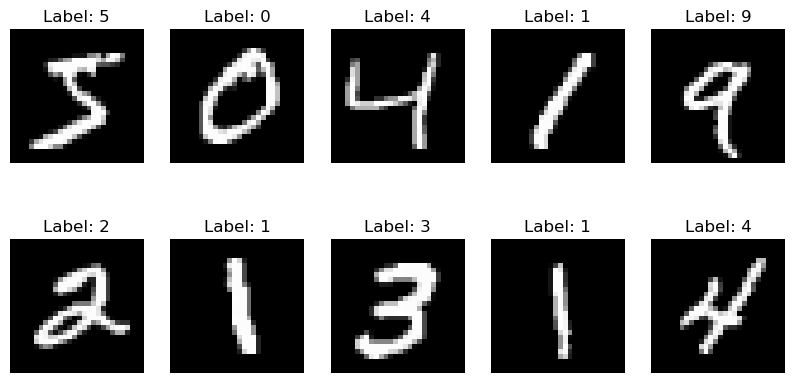

In [3]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

### #preprocess the data

In [4]:
#preprocess the data
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
print('The shape of the training inputs:', x_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',x_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 784)
The shape of the training labels: (60000, 10)
The shape of the testing inputs: (10000, 784)
The shape of the testing labels: (10000, 10)


### Define the activation function k0 + k1 * x

In [6]:
# Define the activation function k0 + k1 * x
class LearnableActivation(tf.keras.layers.Layer):
    def __init__(self, units=1, **kwargs):
        super(LearnableActivation, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        self.k0 = self.add_weight("k0", shape=(self.units,), initializer="zeros", trainable=True)
        self.k1 = self.add_weight("k1", shape=(self.units,), initializer="ones", trainable=True)

    def call(self, inputs):
        return self.k0 + self.k1 * inputs

###  Build the neural network with the learnable activation function

In [7]:
# Build the neural network with the learnable activation function
model = Sequential([
    Dense(128, activation=LearnableActivation(units=128),input_shape=(784,)),
    Dense(64, activation=LearnableActivation(units=64)),
    Dense(32, activation=LearnableActivation(units=32)),
    Dense(10, activation='softmax')
])

### Compile the model and Display the model summary

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100736    
                                                                 
 dense_1 (Dense)             (None, 64)                8384      
                                                                 
 dense_2 (Dense)             (None, 32)                2144      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,594
Trainable params: 111,594
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32,validation_data=(x_test, y_test))


Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3772 - accuracy: 0.8903 - val_loss: 0.3206 - val_accuracy: 0.9066
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3143 - accuracy: 0.9103 - val_loss: 0.3081 - val_accuracy: 0.9099
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3020 - accuracy: 0.9140 - val_loss: 0.2963 - val_accuracy: 0.9150
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2950 - accuracy: 0.9163 - val_loss: 0.2938 - val_accuracy: 0.9200
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2891 - accuracy: 0.9178 - val_loss: 0.2947 - val_accuracy: 0.9198
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2846 - accuracy: 0.9195 - val_loss: 0.2992 - val_accuracy: 0.9208
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2792 - accuracy: 0.9208 - val_loss: 0.3052 - val_accuracy:

### Evaluate the model

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2876 - accuracy: 0.9221
Test Loss: 0.28757986426353455
Test Accuracy: 0.9221000075340271


In [12]:
# Evaluate on train data
train_loss, train_accuracy = model.evaluate(x_train, y_train)

print('Train loss:', train_loss)
print('Train accuracy:', train_accuracy)


1875/1875 [==============================] - 3s 2ms/step - loss: 0.2345 - accuracy: 0.9339
Train loss: 0.23446889221668243
Train accuracy: 0.9339166879653931


### predict the test data

In [13]:
#predict the test data
prediction = model.predict(x_test)
print(prediction[:5])  # Print the first 5 elements of the prediction array


313/313 [==============================] - 1s 1ms/step
[[2.61797737e-07 1.42003032e-14 1.94026347e-06 1.08057829e-02
  2.32340412e-07 4.24953869e-05 4.95866993e-11 9.88806248e-01
  1.07610358e-05 3.32115567e-04]
 [2.85182250e-06 1.99313064e-08 9.96031106e-01 1.04378514e-05
  1.21271189e-20 1.10033783e-04 3.84423719e-03 2.68975398e-24
  1.35324365e-06 5.34692236e-19]
 [2.38871905e-07 9.84785557e-01 9.24343430e-03 1.12602324e-03
  1.03360755e-04 6.01438107e-04 3.20993306e-04 2.29761633e-03
  1.39029941e-03 1.31161360e-04]
 [9.98841584e-01 3.62710834e-11 2.06846962e-04 2.43183604e-06
  1.21003112e-07 2.33537430e-05 8.97464284e-04 1.18179232e-05
  7.47476861e-06 8.95329686e-06]
 [3.14595563e-05 2.71844218e-08 3.82661092e-04 3.52696543e-06
  9.65393901e-01 1.12934931e-05 2.01285773e-04 3.10027623e-03
  6.40131242e-04 3.02354563e-02]]


### let us do prediction for single image

In [14]:
# let us do prediction for single image

print('Probabilities: ', prediction[7])
print('\n')
print('Prediction: ', np.argmax(prediction[7]))

Probabilities:  [2.7600142e-10 1.3046919e-03 4.1492744e-06 8.4030355e-05 2.8315601e-03
 4.2182938e-03 3.4802866e-07 1.4190991e-04 3.0247797e-04 9.9111253e-01]


Prediction:  9


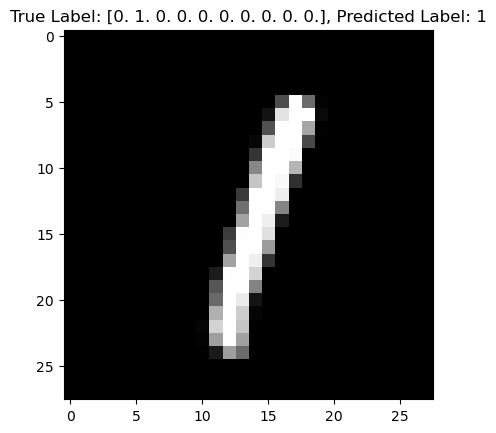

In [15]:
# Index of the image you want to visualize
image_index = 5

# Reshape the flattened image to its original dimensions
image = x_test[image_index].reshape(28, 28)

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"True Label: {y_test[image_index]}, Predicted Label: {np.argmax(prediction[image_index])}")
plt.show()



### Plot the loss function vs. epochs

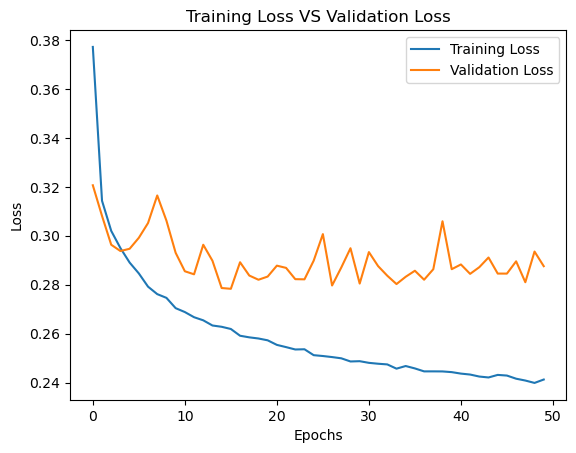

In [16]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss VS Validation Loss')
plt.legend()
plt.show()

### Calculate the F1-score,classification_report and Visualize the confusion matrix

In [17]:
y_pred = model.predict(x_test)
test_predictions = np.argmax(y_pred, axis=1)
f1 = f1_score(np.argmax(y_test,axis=1), test_predictions, average='weighted')
# Calculate the F1-score
print("F1-score:", f1)

313/313 [==============================] - 0s 1ms/step
F1-score: 0.9221830550870216


In [18]:
report = classification_report(np.argmax(y_test,axis=1), test_predictions)

In [19]:
print(report)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.92      0.90      0.91      1032
           3       0.91      0.90      0.91      1010
           4       0.94      0.92      0.93       982
           5       0.89      0.89      0.89       892
           6       0.94      0.96      0.95       958
           7       0.91      0.93      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.89      0.92      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



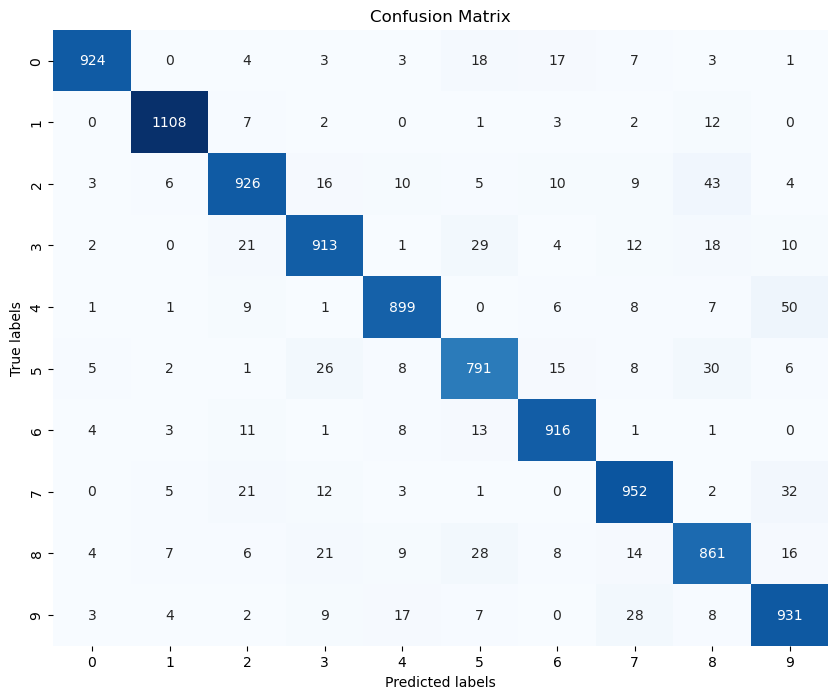

In [20]:
# Create a confusion matrix
confusion_mtx = confusion_matrix(np.argmax(y_test,axis=1), test_predictions)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Save the Model:

In [21]:
from keras.models import load_model

# Save as Keras .h5 file
model.save('my_model.h5')

# Save as TensorFlow SavedModel
model.save('my_model_savedmodel')

INFO:tensorflow:Assets written to: my_model_savedmodel\assets


INFO:tensorflow:Assets written to: my_model_savedmodel\assets
